In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('C:\\Python\\train.csv')

In [3]:
label=train['label']

In [4]:
l1=list()
k=0
for i in range(0,10):
    l1.append(train[train.label==i].index[0])
    
print(l1)

[1, 0, 16, 7, 3, 8, 21, 6, 10, 11]


In [5]:
train=train.drop('label',axis=1)

In [6]:
def imageshow(pixel):
    image=np.array(pixel,dtype='float')
    pixel=image.reshape((28,28))
    plt.imshow(pixel,cmap='gray')
    plt.tight_layout()
    plt.show()

In [7]:
def printdigits(i,j,k):
    x=l1[k]
    pixel=train[x:x+1]
    image=np.array(pixel,dtype='float')
    pixel=image.reshape((28,28))
    axs[i,j].imshow(pixel,cmap='gray')   
    

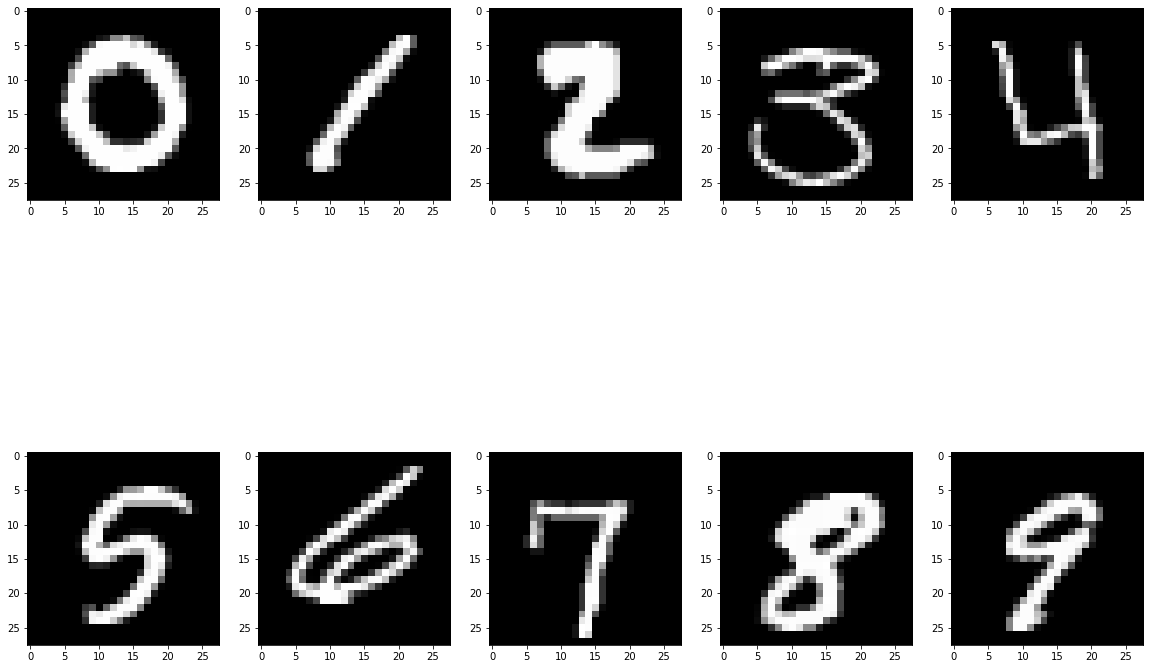

In [8]:
f,axs=plt.subplots(2,5,figsize=(20,15))
k=0
for i in range(0,2):
    for j in range(0,5):
        printdigits(i,j,k)
        k=k+1

In [9]:
pd.factorize(label)

(array([0, 1, 0, ..., 3, 9, 7], dtype=int64),
 Int64Index([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype='int64'))

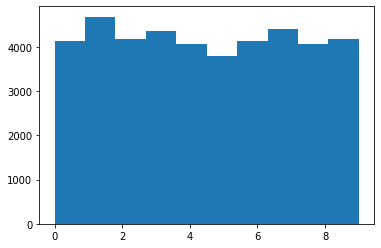

In [10]:
distribution=plt.hist(label)

#-------Standardize the Inputs------------

In [11]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

train=sc.fit_transform(train)

In [12]:
#---------Logistic Regression-----------#

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
randomseed=1

trainx,testx,lblx,lbly=train_test_split(train,label,train_size=0.8)

LogModel_1 = LogisticRegression(C=50. / trainx.shape[0], penalty='l1', solver='saga', tol=0.1, class_weight='balanced')
                                                                        ##----Logistic Regression Model
                            
LogModel_1.fit(trainx,lblx)  ##---Model Parameters


#print(np.mean(LogModel_1.coef_[0]) )      #----Coefficient Value
print(LogModel_1.score(testx,lbly))       #----Test Accuracy

ypred=LogModel_1.predict(testx)           #----Predicting on test data
CountMisclassifications=(ypred!=lbly).sum() #----Counting the number of misclassifications
print(CountMisclassifications)

0.8533333333333334
1232


###--------Neural Nets using PyTorch Implementation

In [57]:
import pandas as pd
import numpy as np
import torch
import torchvision
from torch import nn, optim
from sklearn.model_selection import train_test_split

In [58]:
test=pd.read_csv('C:\\Python\\test_MNIST.csv')
train_nnet=pd.read_csv('C:\\Python\\train.csv')
label_nnet=train_nnet.label.values
train_nnet=train_nnet.drop('label',axis=1)

In [59]:
train_nnet_norm=train_nnet.values/255

In [60]:
features_train, features_test, target_train, target_test = train_test_split(train_nnet_norm, label_nnet, test_size=0.20, random_state=42)

In [61]:
##---- Creating PyTorch Tensor

In [62]:
##--- Train
features_train=torch.from_numpy(features_train)
target_train=np.array(target_train)
target_train = torch.from_numpy(target_train).type(torch.LongTensor)

#--- Test
features_test=torch.from_numpy(features_test)
target_test=np.array(target_test)
target_test = torch.from_numpy(target_test).type(torch.LongTensor)

In [63]:
batch_size=256

train = torch.utils.data.TensorDataset(features_train,target_train)
test =  torch.utils.data.TensorDataset(features_test,target_test)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

In [64]:
# Network - 784---100---64--10

inp=784
hidden=[400,120]
op=10

In [65]:
nnet_model = nn.Sequential(nn.Linear(inp, hidden[0]),
                      nn.ReLU(),
                      nn.Linear(hidden[0], hidden[1]),
                      nn.ReLU(),
                      nn.Linear(hidden[1], op),
                      nn.LogSoftmax(dim=1))

print(nnet_model)

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [66]:
loss_fxn = nn.NLLLoss()

# img, lbls = next(iter(train_loader))
# img = img.view(img.shape[0], -1)

# lgps = nnet_model(img.float()) #log probabilities
# loss = loss_fxn(lgps, lbls) #calculate the NLL loss

In [67]:
learning_rate=0.01
optimizer=torch.optim.Adam(nnet_model.parameters(),lr=learning_rate)
epochs=15
inittime=0

for i in range(epochs):
    run_loss=0
    for img,lbl in train_loader:
        img=img.view(img.shape[0],-1)
        optimizer.zero_grad()
        pred=nnet_model(img.float())
        
        loss=loss_fxn(pred,lbl)
        
        loss.backward()
        
        optimizer.step()
        
        run_loss=run_loss+loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i, run_loss/len(train_loader)))
##-- print("\nTraining Time (in minutes) =",(time()-inittime)/60)

Epoch 0 - Training loss: 0.3172001378667174
Epoch 1 - Training loss: 0.11724730156305613
Epoch 2 - Training loss: 0.08205119461159814
Epoch 3 - Training loss: 0.06156387610473868
Epoch 4 - Training loss: 0.05922859450308324
Epoch 5 - Training loss: 0.056635797658765856
Epoch 6 - Training loss: 0.059829743917692794
Epoch 7 - Training loss: 0.03638365827359711
Epoch 8 - Training loss: 0.04174057099700087
Epoch 9 - Training loss: 0.039413598224972236
Epoch 10 - Training loss: 0.04320651748584527
Epoch 11 - Training loss: 0.03793948370642311
Epoch 12 - Training loss: 0.03268641384431359
Epoch 13 - Training loss: 0.045473067843087134
Epoch 14 - Training loss: 0.03319027604690442


In [68]:
#---- Calculating Accuracy

true_pred=0
total_pred=0

for img,lbl in test_loader:
    for i in range(len(lbl)):
        #print((lbl))
        img1=img[i].view(1,784)
        with torch.no_grad():
            lgps=nnet_model(img1.float())
    
        p=torch.exp(lgps)
        probability=list(p.numpy()[0])
        pred=probability.index(max(probability))
        
        if(pred==lbl.numpy()[i]):
            true_pred=true_pred+1
        total_pred=total_pred+1

print('Number of images validated ->',total_pred)
print('Accuracy ->',true_pred/total_pred)

Number of images validated -> 8400
Accuracy -> 0.9697619047619047
